In [1]:
## Montar google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Cargar el archivo desde Google Drive
import pandas as pd
# Cargar datos de entrenamiento y prueba
df_train = pd.read_excel("/content/drive/MyDrive/MachineLearning/TRAIN/GPT/grouped_trainytrial.xlsx")
df_test = pd.read_excel("/content/drive/MyDrive/MachineLearning/TEST/grouped_data_test.xlsx")



**Entrenamiento con el conjunto de Train**

Se seleccionan las caracteristicas y se buscan los mejores hiperparametros

In [3]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1. Cargar archivo de entrenamiento

# 2. Seleccionar características
columnas_seleccionadas = [
    'POS','NEU','NEG',
   'alegria','tristeza' ,'miedo', 'disgusto', 'enojo', 'sorpresa','toxicity',
   'yo', 'me', 'mi','mí',
   'num_palabras_largas',
   'falta de motivacion',  'aislamiento social',  'pensamientos suicidas',
]

X_train = df_train[columnas_seleccionadas].copy()
y_train = df_train['label']

# 3. Normalizar columnas numéricas
scaler = MinMaxScaler()
X_train[['num_palabras_largas']] = scaler.fit_transform(X_train[[ 'num_palabras_largas']])


#Hiperparametros encontrados en el conjutno de pruebas
modelo_rf = RandomForestClassifier(class_weight= 'balanced', max_depth= 15, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)



modelo_rf.fit(X_train, y_train)

# 8. Guardar el modelo, escalador, label encoder y columnas seleccionadas
joblib.dump(modelo_rf, 'modelo_rf_entrenado.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(columnas_seleccionadas, 'columnas_seleccionadas.pkl')

print("Modelo entrenado y guardado exitosamente.")


Modelo entrenado y guardado exitosamente.


In [4]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2. Cargar modelo, scaler, encoder y columnas seleccionadas
modelo_rf = joblib.load('modelo_rf_entrenado.pkl')
scaler = joblib.load('scaler.pkl')
columnas_seleccionadas = joblib.load('columnas_seleccionadas.pkl')

# 3. Preprocesar el conjunto de prueba
X_test = df_test.reindex(columns=columnas_seleccionadas, fill_value=0)
X_test.loc[:, ['num_palabras_largas']] = scaler.transform(
    X_test[[ 'num_palabras_largas']]
)
y_test = df_test['label']

# 4. Hacer predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# 5. Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados finales en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Resultados finales en el conjunto de prueba:
Accuracy: 0.8275
Precision: 0.8270
Recall: 0.8275
F1 Score: 0.8239

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       200
           1       0.73      0.76      0.75       100
           2       0.84      0.66      0.74       100

    accuracy                           0.83       400
   macro avg       0.81      0.79      0.80       400
weighted avg       0.83      0.83      0.82       400



<ipython-input-4-f99e4534115c>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.11231884 0.02173913 0.01811594 0.08152174 0.04528986 0.27173913
 0.07246377 0.01811594 0.04347826 0.04891304 0.3442029  0.09782609
 0.01811594 0.13224638 0.11956522 0.0615942  0.05434783 0.09057971
 0.04347826 0.21014493 0.0307971  0.14673913 0.05253623 0.08152174
 0.10507246 0.125      0.23550725 0.04166667 0.04166667 0.1557971
 0.25905797 0.07608696 0.03442029 0.25181159 0.06702899 0.05978261
 0.20833333 0.05978261 0.05434783 0.04347826 0.20108696 0.08333333
 0.04347826 0.04891304 0.15036232 0.20652174 0.04710145 0.01630435
 0.1576087  0.15036232 0.10688406 0.01449275 0.0307971  0.08695652
 0.10326087 0.02898551 0.33514493 0.05797101 0.08514493 0.06702899
 0.04710145 0.22101449 0.10144928 0.11050725 0.03804348 0.02717391
 0.04891304 0.01449275 0.02536232 0.03804348 0.15398551 0.11231884
 0.02355072 0.08152174 0.0634058  0.04891304

**Distribucion de clases**

In [ ]:
# Comparar distribución de clases
print("Distribución de clases en Train:")
print(df_train['label'].value_counts(normalize=True))

print("\nDistribución de clases en Test:")
print(df_test['label'].value_counts(normalize=True))


Distribución de clases en Train:
label
0    0.458065
1    0.352688
2    0.189247
Name: proportion, dtype: float64

Distribución de clases en Test:
label
0    0.50
2    0.25
1    0.25
Name: proportion, dtype: float64


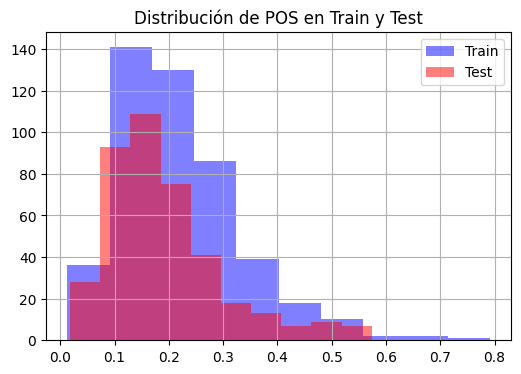

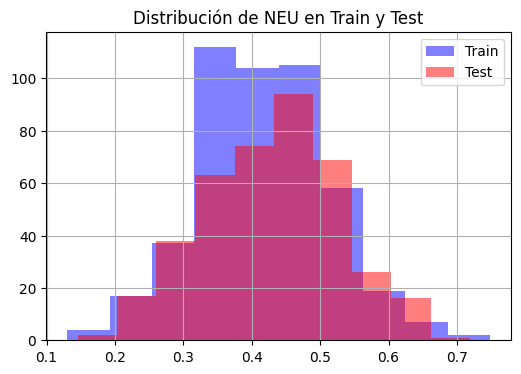

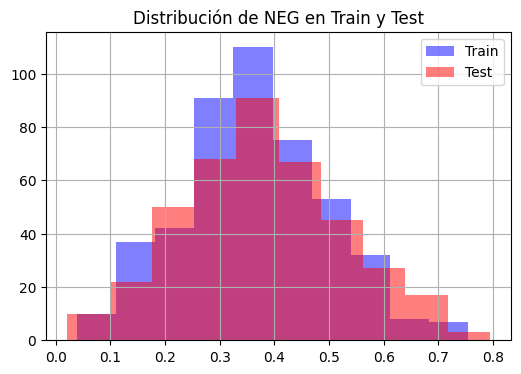

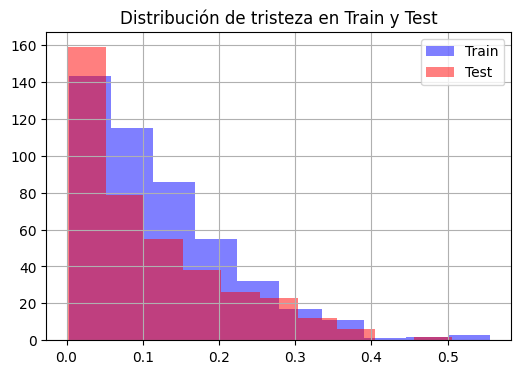

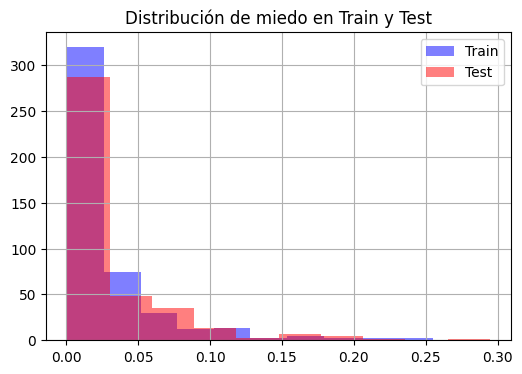

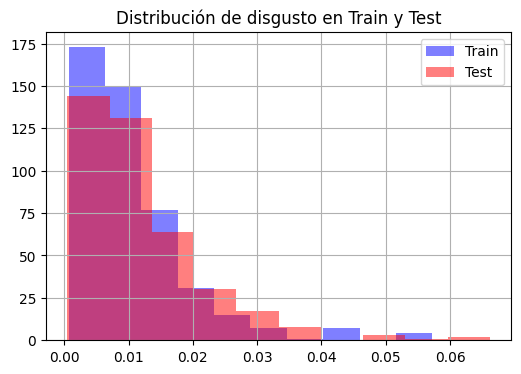

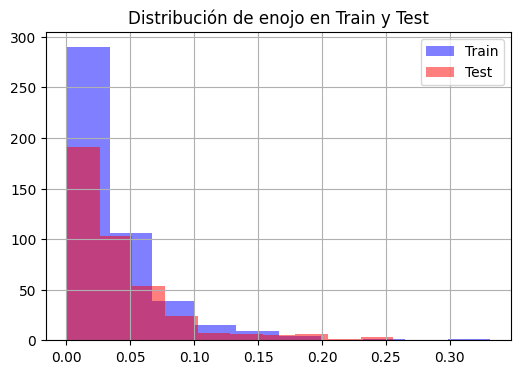

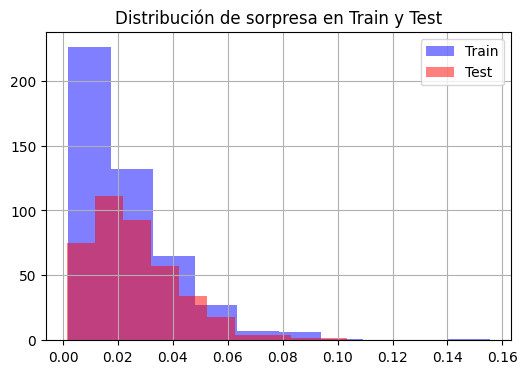

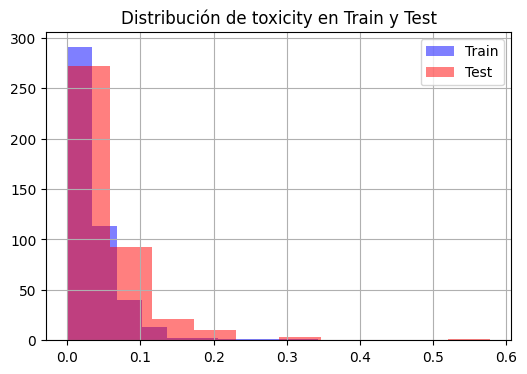

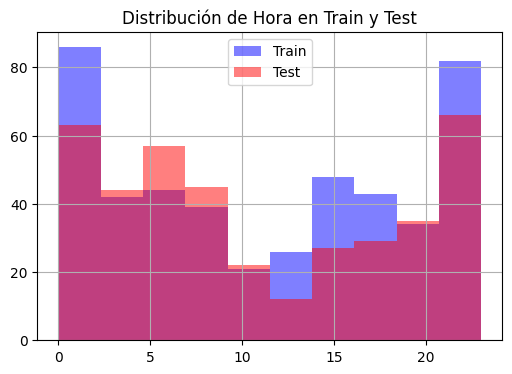

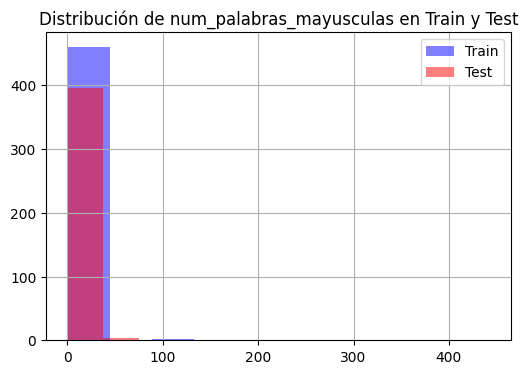

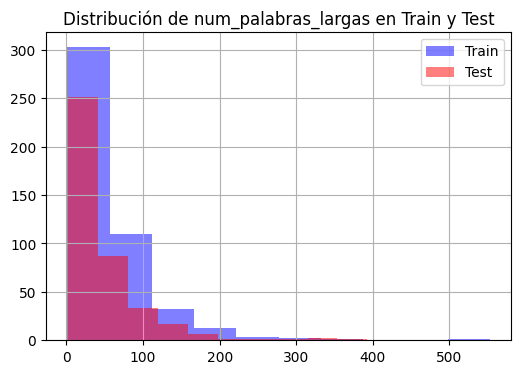

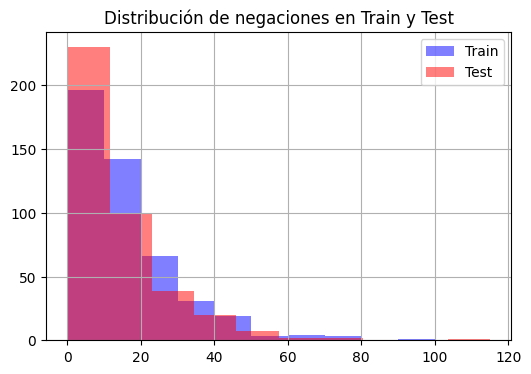

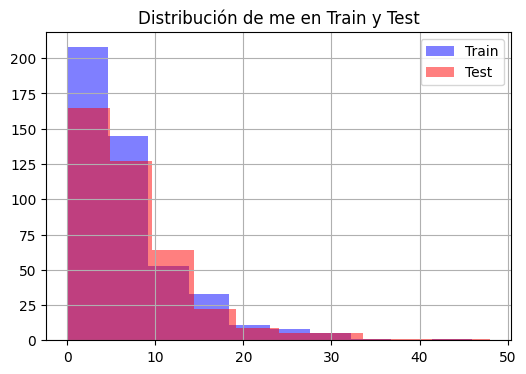

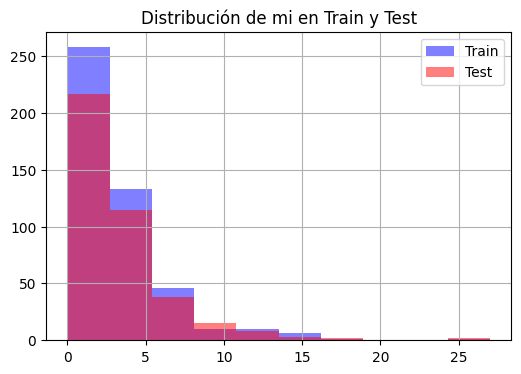

In [ ]:
# Comparar distribuciones de una característica
import matplotlib.pyplot as plt

for col in columnas_seleccionadas:
    plt.figure(figsize=(6, 4))
    df_train[col].hist(alpha=0.5, color='blue', label='Train')
    df_test[col].hist(alpha=0.5, color='red', label='Test')
    plt.legend()
    plt.title(f'Distribución de {col} en Train y Test')
    plt.show()
